In [521]:
import pandas as pd
import numpy as np
import warnings
from Dataset_functions import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress all warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [909]:
premier_league_data = pd.read_csv('premier_league_data.csv')
championship_data = pd.read_csv('championship_data.csv')
spanish1_data = pd.read_csv('spanish1_data.csv')
spanish2_data = pd.read_csv('spanish2_data.csv')
italian1_data = pd.read_csv('italian1_data.csv')
italian2_data = pd.read_csv('italian2_data.csv')
german1_data = pd.read_csv('german1_data.csv')
german2_data = pd.read_csv('german2_data.csv')

In [917]:
premier_league_data

,Div,Date,FTHG,FTAG,Home xG,Away xG,HomeTeam_Arsenal,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Huddersfield,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,AwayTeam_Arsenal,AwayTeam_Bournemouth,AwayTeam_Brighton,AwayTeam_Burnley,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Huddersfield,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,matchday,total_points,total_points_home_team,total_points_away_team,5_form,5_form_home_team,5_form_away_team,10_form,10_form_home_team,10_form_away_team,total_goals,total_goals_home_team,total_goals_away_team,total_goals_against,total_goals_against_home_team,total_goals_against_away_team,total_goals_per_game,total_goals_per_game_home_team,total_goals_per_game_away_team,total_goals_against_per_game,total_goals_against_per_game_home_team,total_goals_against_per_game_away_team,5_form_goals_scored,5_form_goals_scored_home_team,5_form_goals_scored_away_team,5_form_goals_against,5_form_goals_against_home_team,5_form_goals_against_away_team,10_form_goals_scored,10_form_goals_scored_home_team,10_form_goals_scored_away_team,10_form_goals_against,10_form_goals_against_home_team,10_form_goals_against_away_team,total_shots_per_game,total_shots_per_game_home_team,total_shots_per_game_away_team,total_shots_against_per_game,total_shots_against_per_game_home_team,total_shots_against_per_game_away_team,total_shots_on_target_per_game,total_shots_on_target_per_game_home_team,total_shots_on_target_per_game_away_team,total_shots_on_target_against_per_game,total_shots_on_target_against_per_game_home_team,total_shots_on_target_against_per_game_away_team,ovr25_per_game,ovr25_per_game_home_team,ovr25_per_game_away_team,5_form_shots,5_form_shots_home_team,5_form_shots_away_team,5_form_shots_against,5_form_shots_against_home_team,5_form_shots_against_away_team,10_form_shots,10_form_shots_home_team,10_form_shots_away_team,10_form_shots_against,10_form_shots_against_home_team,10_form_shots_against_away_team,5_form_shots_on_target,5_form_shots_on_target_home_team,5_form_shots_on_target_away_team,5_form_shots_on_target_against,5_form_shots_on_target_against_home_team,5_form_shots_on_target_against_away_team,10_form_shots_on_target,10_form_shots_on_target_home_team,10_form_shots_on_target_away_team,10_form_shots_on_target_against,10_form_shots_on_target_against_home_team,10_form_shots_on_target_against_away_team,total_yellow_cards_per_game,total_yellow_cards_per_game_home_team,total_yellow_cards_per_game_away_team,total_yellow_cards_against_per_game,total_yellow_cards_against_per_game_home_team,total_yellow_cards_against_per_game_away_team,total_red_cards_per_game,total_red_cards_per_game_home_team,total_red_cards_per_game_away_team,total_red_cards_against_per_game,total_red_cards_against_per_game_home_team,total_red_cards_against_per_game_away_team,total_xg_per_game,total_xg_per_game_home_team,total_xg_per_game_away_team,total_xg_against_per_game,total_xg_against_per_game_home_team,total_xg_against_per_game_away_team,5_form_xg,5_form_xg_home_team,5_form_xg_away_team,5_form_xg_against,5_form_xg_against_home_team,5_form_xg_against_away_team,10_form_xg,10_form_xg_home_team,10_form_xg_away_team,10_form_xg_against,10_form_xg_against_home_team,10_form_xg_against_away_team,total_points_away,total_points_home,5_form_away,10_form_away,5_form_home,10_form_home,total_goals_away,total_goals_against_away,total_goals_per_game_away,total_goals_against_per_game_away,total_goals_home,total_goals_against_home,total_goals_per_game_home,total_goals_against_per_game_home,5_form_goals_scored_away,10_form_goals

In [911]:
england_data = pd.concat([championship_data,spanish1_data,spanish2_data,italian1_data,italian2_data,german1_data,german2_data, premier_league_data])
england_data.fillna(0, inplace = True)
england_data.sort_values(['Date'], ascending = True, inplace = True)

home_team_columns = [col for col in england_data.columns if col.startswith('HomeTeam_')]
england_data['HomeTeam'] = england_data[home_team_columns].idxmax(axis=1).str.replace('HomeTeam_', '')

# Step 2: Dedummify AwayTeam columns
away_team_columns = [col for col in england_data.columns if col.startswith('AwayTeam_')]
england_data['AwayTeam'] = england_data[away_team_columns].idxmax(axis=1).str.replace('AwayTeam_', '')

england_data[['HomeTeam','AwayTeam']].to_csv('home_away.csv', index = False)

In [912]:
h2h = pd.read_csv('h2h_data.csv')
england_data = pd.merge(england_data, h2h[['Date',	'HomeTeam',	'AwayTeam','Home_h2h_Goals',	'Home_h2h_Points',	'Away_h2h_Goals',	'Away_h2h_Points', 'home_elo', 'away_elo', 'month', 'year']], on =['Date',	'HomeTeam',	'AwayTeam'], how = 'left')
# england_data.drop(['HomeTeam', 'AwayTeam'], axis = 1, inplace = True)
# england_data.drop(['Date', 'Home xG', 'Away xG', 'Time', 'ovr25_per_game'], axis = 1, inplace= True,errors = 'ignore')
# england_data = pd.get_dummies(england_data, columns=['Div', 'year', 'month'])

In [915]:
england_data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']].tail(20)

,HomeTeam,AwayTeam,FTHG,FTAG
19047,Sevilla,Girona,0,2
19048,Heidenheim,Augsburg,4,0
19049,Bayern Munich,Freiburg,2,0
19050,Getafe,Sociedad,0,0
19051,Real Madrid,Betis,2,0
19052,Sheffield United,Watford,1,0
19053,Paderborn,Ulm,0,0
19054,Alaves,Las Palmas,2,0
19055,Schalke 04,FC Koln,1,3
19056,Osasuna,Celta,3,2


In [687]:
england_data.corr()['FTHG'].sort_values(ascending = False).head(25)

FTHG                                                1.000000
home_win_odds                                       0.329306
total_goals_per_game_home_team                      0.209820
home_elo                                            0.204021
total_shots_on_target_per_game_home_team            0.190612
total_goals_per_game_home                           0.179166
10_form_goals_scored_home_team                      0.163177
total_shots_on_target_per_game_home                 0.160799
5_form_goals_scored_home_team                       0.155326
5_form_shots_on_target_home_team                    0.151816
5_form_goals_scored_home                            0.151484
10_form_shots_on_target_home_team                   0.146061
total_xg_per_game_home_team                         0.145648
total_shots_per_game_home_team                      0.145030
Home_h2h_Points                                     0.140868
10_form_home_team                                   0.135846
5_form_shots_on_target_h

In [648]:
england_data.corr()['FTHG'].sort_values(ascending = False).tail(25)

FTAG                                               -0.053867
10_form_shots_against_home_team                    -0.055666
10_form_goals_scored_away_team                     -0.056680
total_yellow_cards_per_game_home                   -0.056818
total_goals_per_game_away                          -0.056872
10_form_goals_against_home_team                    -0.057051
total_shots_on_target_against_per_game_home_team   -0.058748
total_shots_against_per_game_home                  -0.062876
10_form_shots_home_team                            -0.064650
5_form_shots_against_home_team                     -0.064650
Div_SP2                                            -0.072193
total_points_away                                  -0.072487
total_points_away_team                             -0.073014
total_goals_per_game_away_team                     -0.075986
total_shots_against_per_game_home_team             -0.076973
5_form_away                                        -0.077942
Away_h2h_Goals          

In [553]:
england_data.corr()['FTAG'].sort_values(ascending = False).head(25)

FTAG                                                1.000000
away_win_odds                                       0.320630
away_elo                                            0.189289
total_goals_per_game_away_team                      0.183077
total_shots_on_target_per_game_away_team            0.175759
5_form_goals_scored_away_team                       0.148973
5_form_shots_on_target_away_team                    0.146031
total_goals_per_game_away                           0.145275
10_form_goals_scored_away_team                      0.143036
total_shots_on_target_per_game_away                 0.141734
total_xg_per_game_away_team                         0.133709
total_shots_per_game_away_team                      0.131656
10_form_shots_on_target_away_team                   0.129907
total_shots_on_target_against_per_game_home_team    0.128410
total_goals_against_per_game_home_team              0.121275
Away_h2h_Goals                                      0.116752
5_form_shots_away_team  

In [554]:
england_data.corr()['FTAG'].sort_values(ascending = False).tail(25)

10_form_goals_scored_home_team           -0.051968
5_form_goals_against_away                -0.053774
FTHG                                     -0.054560
10_form_shots_against_away_team          -0.055458
Home_h2h_Goals                           -0.056371
10_form_goals_against_away_team          -0.057513
total_yellow_cards_per_game_away_team    -0.057542
total_goals_per_game_home                -0.058603
5_form_goals_against_away_team           -0.061079
total_shots_against_per_game_away        -0.061738
total_goals_against_per_game_away        -0.062382
total_goals_per_game_home_team           -0.062704
5_form_shots_against_away_team           -0.066829
total_points_home                        -0.070419
total_goals_against_per_game_away_team   -0.072063
total_points_home_team                   -0.074669
home_elo                                 -0.075711
total_shots_against_per_game_away_team   -0.077885
10_form_home                             -0.079190
5_form_home                    

In [555]:
england_data.corr()['home_win_odds'].sort_values(ascending = False).head(10)

home_win_odds                               1.000000
home_elo                                    0.482465
total_goals_per_game_home_team              0.455742
10_form_home_team                           0.387095
total_shots_on_target_per_game_home_team    0.382653
total_goals_per_game_home                   0.378114
5_form_home_team                            0.373494
Home_h2h_Points                             0.365905
10_form_goals_scored_home_team              0.360989
5_form_goals_scored_home_team               0.350593
Name: home_win_odds, dtype: float64

In [556]:
england_data.corr()['home_win_odds'].sort_values(ascending = False).tail(10)

5_form_away                                -0.317401
total_goals_against_per_game_home_team     -0.319084
total_shots_on_target_per_game_away_team   -0.323385
5_form_away_team                           -0.344036
10_form_away_team                          -0.360667
Away_h2h_Points                            -0.361999
total_goals_per_game_away_team             -0.398112
away_elo                                   -0.403442
draw_odds                                  -0.420784
away_win_odds                              -0.945889
Name: home_win_odds, dtype: float64

In [557]:
england_data.corr()['draw_odds'].sort_values(ascending = False).head(10)

draw_odds                                     1.000000
Div_SP2                                       0.342005
away_win_odds                                 0.198063
total_yellow_cards_per_game_home              0.144354
total_yellow_cards_per_game_home_team         0.142374
Div_E1                                        0.131303
total_red_cards_per_game_home_team            0.111380
Away_h2h_Points                               0.104432
total_shots_against_per_game_home_team        0.101637
total_red_cards_against_per_game_away_team    0.092109
Name: draw_odds, dtype: float64

In [558]:
england_data.corr()['draw_odds'].sort_values(ascending = False).tail(10)

total_xg_per_game_home_team                -0.308861
total_shots_on_target_per_game_home        -0.323228
5_form_shots_on_target_home_team           -0.324525
5_form_goals_scored_home_team              -0.342658
10_form_goals_scored_home_team             -0.348667
total_goals_per_game_home                  -0.357786
total_shots_on_target_per_game_home_team   -0.400965
home_win_odds                              -0.420784
total_goals_per_game_home_team             -0.442593
home_elo                                   -0.529549
Name: draw_odds, dtype: float64

In [559]:
england_data.corr()['away_win_odds'].sort_values(ascending = False).head(10)

away_win_odds                               1.000000
away_elo                                    0.516342
total_goals_per_game_away_team              0.486968
total_shots_on_target_per_game_away_team    0.413461
10_form_away_team                           0.390442
total_goals_per_game_away                   0.382945
10_form_goals_scored_away_team              0.381490
5_form_away_team                            0.375632
5_form_goals_scored_away_team               0.372094
Away_h2h_Points                             0.366021
Name: away_win_odds, dtype: float64

In [560]:
england_data.corr()['away_win_odds'].sort_values(ascending = False).tail(10)

total_shots_on_target_per_game_home_team   -0.285029
FTHG                                       -0.285509
total_goals_per_game_home                  -0.299680
total_goals_against_per_game_away_team     -0.310657
5_form_home_team                           -0.331319
10_form_home_team                          -0.343834
Home_h2h_Points                            -0.347521
home_elo                                   -0.355278
total_goals_per_game_home_team             -0.355875
home_win_odds                              -0.945889
Name: away_win_odds, dtype: float64

In [307]:
summary = england_data.describe(include='all').T

# Add missing value count
summary['Missing Values'] = england_data.isnull().sum()

# Add mode for each column
summary['Mode'] = england_data.mode().iloc[0]

# Display the summary table
summary = summary[['count', 'mean', '50%', 'std', 'min', '25%', '50%', '75%', 'max', 'Missing Values', 'Mode']]
summary.columns = ['Count', 'Mean', 'Median', 'Std. Dev', 'Min', 'Q1', 'Q2', 'Q3', 'Max', 'Missing Values', 'Mode']


In [309]:
summary

,Count,Mean,Median,Std. Dev,Min,Q1,Q2,Q3,Max,Missing Values,Mode
FTHG,19047.0,1.490681,1.0,1.257511,0.0,1.0,1.0,2.0,9.0,0,1
FTAG,19047.0,1.202814,1.0,1.138326,0.0,0.0,1.0,2.0,9.0,0,1
HomeTeam_Arsenal,2690.0,0.050186,0.0,0.218369,0.0,0.0,0.0,0.0,1.0,16357,0.0
HomeTeam_Bournemouth,6050.0,0.023471,0.0,0.151407,0.0,0.0,0.0,0.0,1.0,12997,0.0
HomeTeam_Brighton,2690.0,0.049814,0.0,0.217601,0.0,0.0,0.0,0.0,1.0,16357,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Div_E0,19047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
Div_E1,19047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
Div_I1,19047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
Div_SP1,19047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False


In [367]:
england_data2 = england_data.copy()
england_data2.drop(['total_points_home_team', 'total_points_away_team', 'matchday',
                    'total_goals_home_team','total_goals_against','total_points','total_goals_against_home_team',
                   'total_goals_against_away_team', 'total_shots_on_target_per_game_home_team', 'total_shots_against_per_game_away_team',
                   'total_shots_per_game_home','total_goals_away_team','total_shots_on_target_per_game_away_team', '10_form_shots', '10_form_shots_away_team',
                    '10_form_shots_against_home_team','10_form_shots_against_away_team', '10_form_shots_on_target_against_away_team','10_form_shots_home_team',
                    '10_form_shots_against','10_form_shots_on_target_home_team','10_form_shots_on_target_against', '10_form_xg_against_away_team', 
                    '10_form_shots_on_target_against_home_team', '10_form_shots_on_target', 'total_points_away', 'total_points_home', '10_form_shots_away',
                    '10_form_shots_home','total_shots_on_target_against_per_game_away','10_form_goals_scored_home', '10_form_shots_against_home',
                    '10_form_shots_on_target_home', '10_form_shots_on_target_away','10_form_shots_on_target_away_team','10_form_xg_home_team',
                    '10_form_shots_against_away', '10_form_shots_on_target_against_home','total_shots_on_target_per_game_away', 
                    '5_form_shots_on_target_home','10_form_shots_on_target_against_away'
                   ],inplace = True, axis = 1, errors = 'ignore')
corr_matrix = england_data2.corr()

# Find pairs of variables with correlation > 0.9
high_corr_pairs = []

# Iterate over the matrix to find pairs with correlation > 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

In [ ]:
numeric_columns = england_data.select_dtypes(include=['float64', 'int64']).columns
for i in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(england_data[i].dropna())
    plt.title(f'Box Plot of {i}')
    plt.ylabel(i)
    plt.show()

In [ ]:
# We now have 2 dataframes, england, with all primary variables and england2 with removeer variables that had high collinearity

In [881]:
targets = england_data[['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds']]
# targets2 = england_data2[['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds']]

In [883]:
england_data.drop(['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds'], inplace= True, axis = 1)
# england_data2.drop(['FTHG', 'FTAG','home_win_odds', 'draw_odds', 'away_win_odds'], inplace= True, axis = 1)

In [885]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_minmax = MinMaxScaler()
numeric_columns = england_data.select_dtypes(include=['float64', 'int64']).columns
# numeric_columns2 = england_data2.select_dtypes(include=['float64', 'int64']).columns

england_data_n = pd.DataFrame(scaler_minmax.fit_transform(england_data[numeric_columns]), columns=numeric_columns)
# england_data2_n = pd.DataFrame(scaler_minmax.fit_transform(england_data2[numeric_columns2]), columns=numeric_columns2)


england_data[numeric_columns] = england_data_n
# england_data2[numeric_columns2] = england_data2_n

In [373]:
from sklearn.decomposition import PCA

pca_all = PCA(n_components=None)
pca_50 = PCA(n_components=50)
pca_100 = PCA(n_components=100)

pca_all_2 = PCA(n_components=None)
pca_50_2 = PCA(n_components=50)
pca_100_2 = PCA(n_components=100)

def create_pca(pca, data):
    pca_result = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend(loc='best')
    plt.show()

    for i, var in enumerate(cumulative_variance):
        print(f"PC{i+1}: {var:.4f}")
    return pca_df


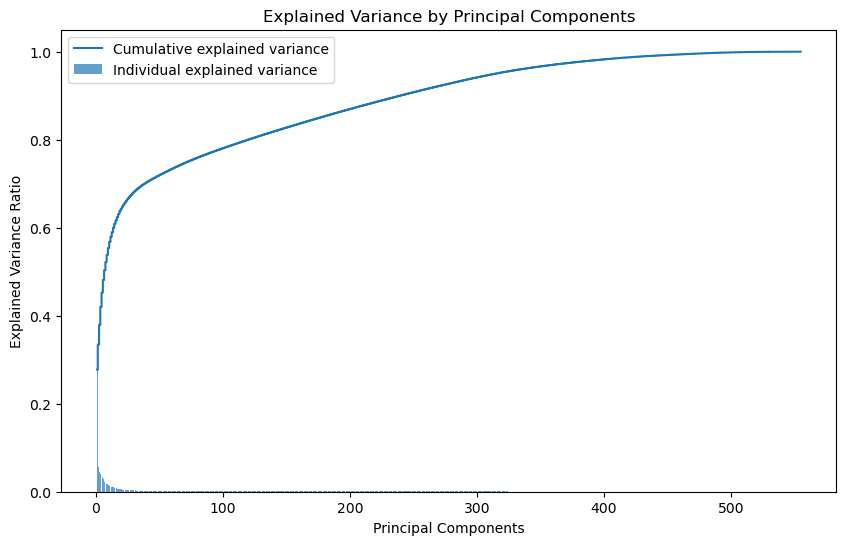

PC1: 0.2774
PC2: 0.3345
PC3: 0.3792
PC4: 0.4202
PC5: 0.4526
PC6: 0.4813
PC7: 0.5033
PC8: 0.5219
PC9: 0.5385
PC10: 0.5540
PC11: 0.5681
PC12: 0.5795
PC13: 0.5897
PC14: 0.5999
PC15: 0.6090
PC16: 0.6170
PC17: 0.6240
PC18: 0.6308
PC19: 0.6373
PC20: 0.6427
PC21: 0.6477
PC22: 0.6523
PC23: 0.6565
PC24: 0.6607
PC25: 0.6646
PC26: 0.6681
PC27: 0.6715
PC28: 0.6748
PC29: 0.6779
PC30: 0.6808
PC31: 0.6837
PC32: 0.6862
PC33: 0.6886
PC34: 0.6909
PC35: 0.6931
PC36: 0.6953
PC37: 0.6974
PC38: 0.6994
PC39: 0.7012
PC40: 0.7031
PC41: 0.7048
PC42: 0.7066
PC43: 0.7082
PC44: 0.7099
PC45: 0.7114
PC46: 0.7130
PC47: 0.7145
PC48: 0.7161
PC49: 0.7176
PC50: 0.7191
PC51: 0.7206
PC52: 0.7221
PC53: 0.7236
PC54: 0.7251
PC55: 0.7265
PC56: 0.7280
PC57: 0.7294
PC58: 0.7308
PC59: 0.7323
PC60: 0.7337
PC61: 0.7350
PC62: 0.7364
PC63: 0.7378
PC64: 0.7391
PC65: 0.7405
PC66: 0.7418
PC67: 0.7432
PC68: 0.7445
PC69: 0.7458
PC70: 0.7470
PC71: 0.7483
PC72: 0.7496
PC73: 0.7508
PC74: 0.7520
PC75: 0.7532
PC76: 0.7544
PC77: 0.7556
PC78: 0.

In [375]:
df_pca_all = create_pca(pca_all, england_data)

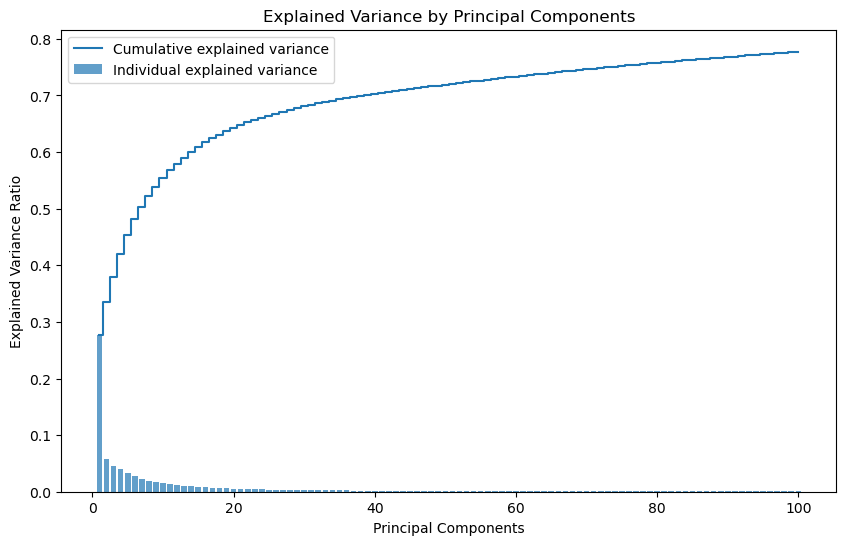

PC1: 0.2774
PC2: 0.3345
PC3: 0.3792
PC4: 0.4202
PC5: 0.4526
PC6: 0.4813
PC7: 0.5033
PC8: 0.5219
PC9: 0.5385
PC10: 0.5540
PC11: 0.5681
PC12: 0.5795
PC13: 0.5897
PC14: 0.5999
PC15: 0.6090
PC16: 0.6170
PC17: 0.6240
PC18: 0.6308
PC19: 0.6373
PC20: 0.6427
PC21: 0.6477
PC22: 0.6523
PC23: 0.6565
PC24: 0.6607
PC25: 0.6646
PC26: 0.6681
PC27: 0.6715
PC28: 0.6748
PC29: 0.6779
PC30: 0.6808
PC31: 0.6837
PC32: 0.6862
PC33: 0.6886
PC34: 0.6909
PC35: 0.6931
PC36: 0.6953
PC37: 0.6974
PC38: 0.6993
PC39: 0.7012
PC40: 0.7030
PC41: 0.7048
PC42: 0.7065
PC43: 0.7082
PC44: 0.7098
PC45: 0.7114
PC46: 0.7129
PC47: 0.7144
PC48: 0.7160
PC49: 0.7175
PC50: 0.7190
PC51: 0.7205
PC52: 0.7219
PC53: 0.7234
PC54: 0.7249
PC55: 0.7263
PC56: 0.7277
PC57: 0.7291
PC58: 0.7305
PC59: 0.7319
PC60: 0.7332
PC61: 0.7346
PC62: 0.7359
PC63: 0.7373
PC64: 0.7386
PC65: 0.7399
PC66: 0.7412
PC67: 0.7425
PC68: 0.7437
PC69: 0.7450
PC70: 0.7462
PC71: 0.7474
PC72: 0.7486
PC73: 0.7498
PC74: 0.7510
PC75: 0.7521
PC76: 0.7533
PC77: 0.7544
PC78: 0.

In [376]:
df_pca_100 = create_pca(pca_100, england_data)

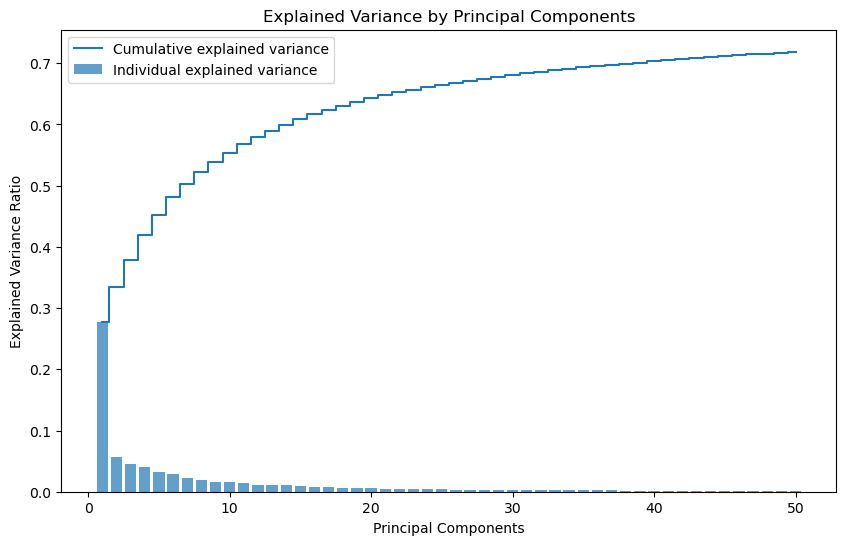

PC1: 0.2774
PC2: 0.3345
PC3: 0.3792
PC4: 0.4202
PC5: 0.4526
PC6: 0.4813
PC7: 0.5033
PC8: 0.5219
PC9: 0.5385
PC10: 0.5540
PC11: 0.5681
PC12: 0.5795
PC13: 0.5897
PC14: 0.5999
PC15: 0.6090
PC16: 0.6170
PC17: 0.6240
PC18: 0.6308
PC19: 0.6373
PC20: 0.6427
PC21: 0.6477
PC22: 0.6523
PC23: 0.6565
PC24: 0.6607
PC25: 0.6646
PC26: 0.6681
PC27: 0.6715
PC28: 0.6748
PC29: 0.6779
PC30: 0.6808
PC31: 0.6837
PC32: 0.6862
PC33: 0.6886
PC34: 0.6909
PC35: 0.6931
PC36: 0.6953
PC37: 0.6974
PC38: 0.6993
PC39: 0.7012
PC40: 0.7030
PC41: 0.7048
PC42: 0.7065
PC43: 0.7082
PC44: 0.7098
PC45: 0.7113
PC46: 0.7128
PC47: 0.7144
PC48: 0.7159
PC49: 0.7174
PC50: 0.7188


In [377]:
df_pca_50 = create_pca(pca_50, england_data)

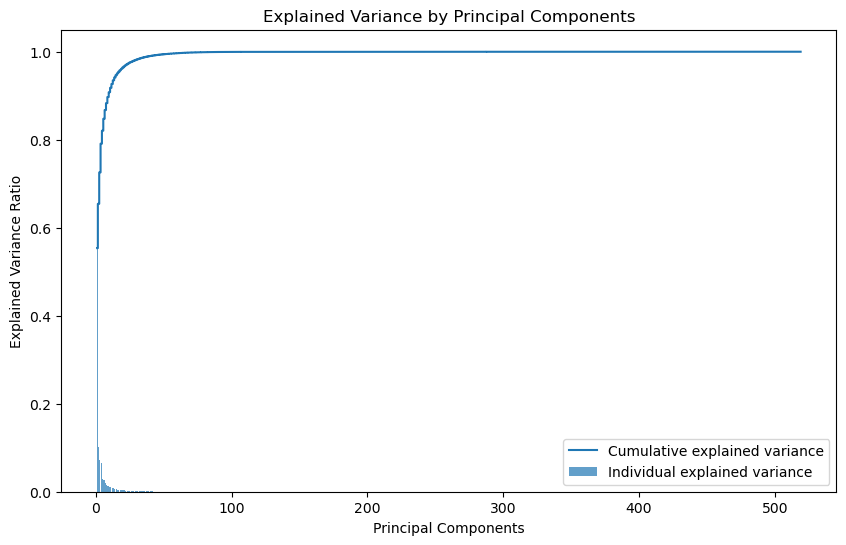

PC1: 0.5536
PC2: 0.6543
PC3: 0.7257
PC4: 0.7910
PC5: 0.8205
PC6: 0.8476
PC7: 0.8675
PC8: 0.8831
PC9: 0.8970
PC10: 0.9080
PC11: 0.9180
PC12: 0.9267
PC13: 0.9350
PC14: 0.9414
PC15: 0.9465
PC16: 0.9508
PC17: 0.9546
PC18: 0.9579
PC19: 0.9611
PC20: 0.9641
PC21: 0.9669
PC22: 0.9692
PC23: 0.9714
PC24: 0.9734
PC25: 0.9751
PC26: 0.9767
PC27: 0.9781
PC28: 0.9794
PC29: 0.9807
PC30: 0.9819
PC31: 0.9830
PC32: 0.9841
PC33: 0.9851
PC34: 0.9860
PC35: 0.9869
PC36: 0.9876
PC37: 0.9883
PC38: 0.9890
PC39: 0.9896
PC40: 0.9902
PC41: 0.9907
PC42: 0.9912
PC43: 0.9917
PC44: 0.9921
PC45: 0.9925
PC46: 0.9929
PC47: 0.9933
PC48: 0.9936
PC49: 0.9939
PC50: 0.9942
PC51: 0.9945
PC52: 0.9948
PC53: 0.9950
PC54: 0.9953
PC55: 0.9955
PC56: 0.9958
PC57: 0.9960
PC58: 0.9962
PC59: 0.9964
PC60: 0.9966
PC61: 0.9968
PC62: 0.9970
PC63: 0.9972
PC64: 0.9973
PC65: 0.9975
PC66: 0.9976
PC67: 0.9978
PC68: 0.9979
PC69: 0.9980
PC70: 0.9982
PC71: 0.9983
PC72: 0.9984
PC73: 0.9984
PC74: 0.9985
PC75: 0.9986
PC76: 0.9987
PC77: 0.9988
PC78: 0.

In [378]:
df_pca_all_2 = create_pca(pca_all_2, england_data2)

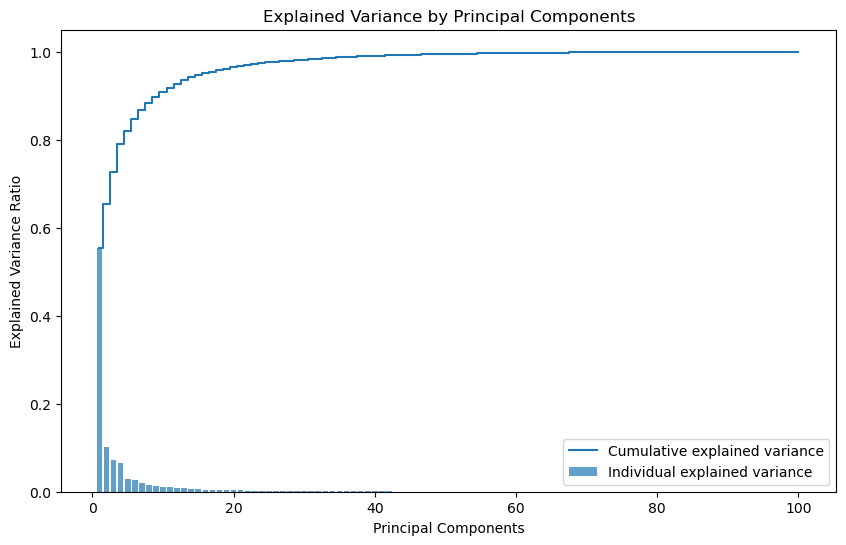

PC1: 0.5536
PC2: 0.6543
PC3: 0.7257
PC4: 0.7910
PC5: 0.8205
PC6: 0.8476
PC7: 0.8675
PC8: 0.8831
PC9: 0.8970
PC10: 0.9080
PC11: 0.9180
PC12: 0.9267
PC13: 0.9350
PC14: 0.9414
PC15: 0.9465
PC16: 0.9508
PC17: 0.9546
PC18: 0.9579
PC19: 0.9611
PC20: 0.9641
PC21: 0.9669
PC22: 0.9692
PC23: 0.9714
PC24: 0.9734
PC25: 0.9751
PC26: 0.9767
PC27: 0.9781
PC28: 0.9794
PC29: 0.9807
PC30: 0.9819
PC31: 0.9830
PC32: 0.9841
PC33: 0.9851
PC34: 0.9860
PC35: 0.9869
PC36: 0.9876
PC37: 0.9883
PC38: 0.9890
PC39: 0.9896
PC40: 0.9902
PC41: 0.9907
PC42: 0.9912
PC43: 0.9917
PC44: 0.9921
PC45: 0.9925
PC46: 0.9929
PC47: 0.9933
PC48: 0.9936
PC49: 0.9939
PC50: 0.9942
PC51: 0.9945
PC52: 0.9948
PC53: 0.9950
PC54: 0.9953
PC55: 0.9955
PC56: 0.9958
PC57: 0.9960
PC58: 0.9962
PC59: 0.9964
PC60: 0.9966
PC61: 0.9968
PC62: 0.9970
PC63: 0.9972
PC64: 0.9973
PC65: 0.9975
PC66: 0.9976
PC67: 0.9978
PC68: 0.9979
PC69: 0.9980
PC70: 0.9982
PC71: 0.9983
PC72: 0.9984
PC73: 0.9984
PC74: 0.9985
PC75: 0.9986
PC76: 0.9987
PC77: 0.9988
PC78: 0.

In [379]:
df_pca_100_2 = create_pca(pca_100_2, england_data2)

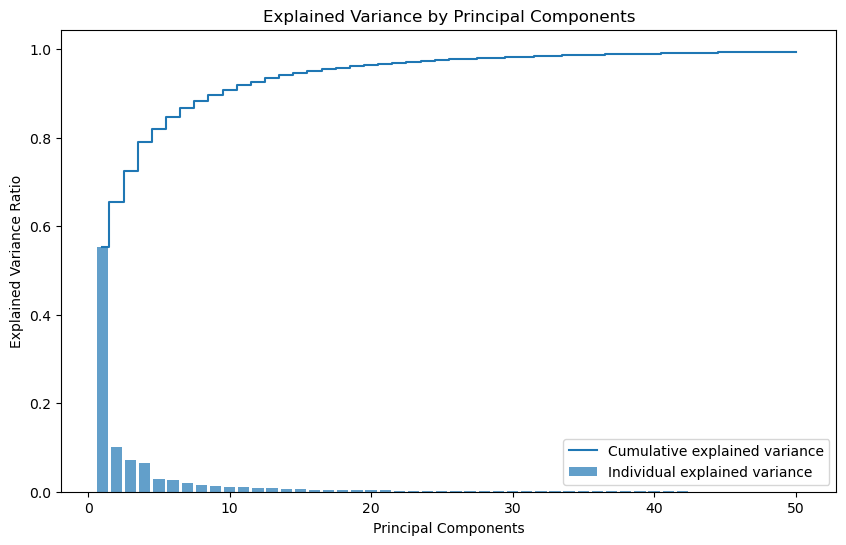

PC1: 0.5536
PC2: 0.6543
PC3: 0.7257
PC4: 0.7910
PC5: 0.8205
PC6: 0.8476
PC7: 0.8675
PC8: 0.8831
PC9: 0.8970
PC10: 0.9080
PC11: 0.9180
PC12: 0.9267
PC13: 0.9350
PC14: 0.9414
PC15: 0.9465
PC16: 0.9508
PC17: 0.9546
PC18: 0.9579
PC19: 0.9611
PC20: 0.9641
PC21: 0.9669
PC22: 0.9692
PC23: 0.9714
PC24: 0.9734
PC25: 0.9751
PC26: 0.9767
PC27: 0.9781
PC28: 0.9794
PC29: 0.9807
PC30: 0.9819
PC31: 0.9830
PC32: 0.9841
PC33: 0.9851
PC34: 0.9860
PC35: 0.9869
PC36: 0.9876
PC37: 0.9883
PC38: 0.9890
PC39: 0.9896
PC40: 0.9902
PC41: 0.9907
PC42: 0.9912
PC43: 0.9917
PC44: 0.9921
PC45: 0.9925
PC46: 0.9929
PC47: 0.9933
PC48: 0.9936
PC49: 0.9939
PC50: 0.9942


In [380]:
df_pca_50_2 = create_pca(pca_50_2, england_data2)

In [887]:
england_data.to_csv('default_data_all_variables.csv',index = False)
# england_data2.to_csv('default_data_removed_variables.csv',index = False)
# df_pca_50.to_csv('pca_50_data_all_variables.csv',index = False)
# df_pca_50_2.to_csv('pca_50_data_removed_variables.csv',index = False)


In [888]:
england_data

,HomeTeam_Aston Villa,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Bolton,HomeTeam_Brentford,HomeTeam_Bristol City,HomeTeam_Derby,HomeTeam_Hull,HomeTeam_Ipswich,HomeTeam_Leeds,HomeTeam_Middlesbrough,HomeTeam_Millwall,HomeTeam_Norwich,HomeTeam_Nott'm Forest,HomeTeam_Preston,HomeTeam_QPR,HomeTeam_Reading,HomeTeam_Rotherham,HomeTeam_Sheffield United,HomeTeam_Sheffield Weds,HomeTeam_Stoke,HomeTeam_Swansea,HomeTeam_West Brom,HomeTeam_Wigan,AwayTeam_Aston Villa,AwayTeam_Birmingham,AwayTeam_Blackburn,AwayTeam_Bolton,AwayTeam_Brentford,AwayTeam_Bristol City,AwayTeam_Derby,AwayTeam_Hull,AwayTeam_Ipswich,AwayTeam_Leeds,AwayTeam_Middlesbrough,AwayTeam_Millwall,AwayTeam_Norwich,AwayTeam_Nott'm Forest,AwayTeam_Preston,AwayTeam_QPR,AwayTeam_Reading,AwayTeam_Rotherham,AwayTeam_Sheffield United,AwayTeam_Sheffield Weds,AwayTeam_Stoke,AwayTeam_Swansea,AwayTeam_West Brom,AwayTeam_Wigan,matchday,total_points,total_points_home_team,total_points_away_team,5_form,5_form_home_team,5_form_away_team,10_form,10_form_home_team,10_form_away_team,total_goals,total_goals_home_team,total_goals_away_team,total_goals_against,total_goals_against_home_team,total_goals_against_away_team,total_goals_per_game,total_goals_per_game_home_team,total_goals_per_game_away_team,total_goals_against_per_game,total_goals_against_per_game_home_team,total_goals_against_per_game_away_team,5_form_goals_scored,5_form_goals_scored_home_team,5_form_goals_scored_away_team,5_form_goals_against,5_form_goals_against_home_team,5_form_goals_against_away_team,10_form_goals_scored,10_form_goals_scored_home_team,10_form_goals_scored_away_team,10_form_goals_against,10_form_goals_against_home_team,10_form_goals_against_away_team,total_shots_per_game,total_shots_per_game_home_team,total_shots_per_game_away_team,total_shots_against_per_game,total_shots_against_per_game_home_team,total_shots_against_per_game_away_team,total_shots_on_target_per_game,total_shots_on_target_per_game_home_team,total_shots_on_target_per_game_away_team,total_shots_on_target_against_per_game,total_shots_on_target_against_per_game_home_team,total_shots_on_target_against_per_game_away_team,ovr25_per_game_home_team,ovr25_per_game_away_team,5_form_shots,5_form_shots_home_team,5_form_shots_away_team,5_form_shots_against,5_form_shots_against_home_team,5_form_shots_against_away_team,10_form_shots,10_form_shots_home_team,10_form_shots_away_team,10_form_shots_against,10_form_shots_against_home_team,10_form_shots_against_away_team,5_form_shots_on_target,5_form_shots_on_target_home_team,5_form_shots_on_target_away_team,5_form_shots_on_target_against,5_form_shots_on_target_against_home_team,5_form_shots_on_target_against_away_team,10_form_shots_on_target,10_form_shots_on_target_home_team,10_form_shots_on_target_away_team,10_form_shots_on_target_against,10_form_shots_on_target_against_home_team,10_form_shots_on_target_against_away_team,total_yellow_cards_per_game,total_yellow_cards_per_game_home_team,total_yellow_cards_per_game_away_team,total_yellow_cards_against_per_game,total_yellow_cards_against_per_game_home_team,total_yellow_cards_against_per_game_away_team,total_red_cards_per_game,total_red_cards_per_game_home_team,total_red_cards_per_game_away_team,total_red_cards_against_per_game,total_red_cards_against_per_game_home_team,total_red_cards_against_per_game_away_team,total_xg_per_game,total_xg_per_game_home_team,total_xg_per_game_away_team,total_xg_against_per_game,total_xg_against_per_game_home_team,total_xg_against_per_game_away_team,5_form_xg,5_form_xg_home_team,5_form_xg_away_team,5_form_xg_against,5_form_xg_against_home_team,5_form_xg_against_away_team,10_form_xg,10_form_xg_home_team,10_form_xg_away_team,10_form_xg_against,10_form_xg_against_home_team,10_form_xg_against_away_team,total_points_away,total_points_home,5_form_away,10_form_away,5_form_home,10_form_home,total_goals_away,total_goals_against_away,total_goals_per_game_away,total_goals_against_per_game_away,total_goals_home,total_goals_against_home,total_goals_pe

In [889]:
targets.to_csv('targets.csv',index = False)

In [871]:
england_data.isna().sum().sum()

0

In [ ]:
# co dodać

Target ---> wyliczenie prawdopodobieństwa każdego z 1x2 (opcjonalnie porówanie strzelonych bramek) i porównanie z kursasmi/prawdziwymi wynikami?

# oddsy na prawdopodobieństwo --- done
# wartość lineupów /suma wages zawodników?
# średnia zdobywanych/traconych bramek w sezonie(poprzednich)
# pozycja w tabeli >>>>>>>> to samo co punkty
# podania total/dom/wyjazd średnia z ost 5/srednia sezonowa 
# posiadanie piłki dom/wyjazd
# forma dom/wyjazd -- GOTOWE
# brasmki drużyny i przeciwko -- GOTOWE
# xg-- GOTOWE
# strzały ------ ---
# kartki ----------
# h2h drużyny powyższe 
# punkty i forma ostatnich 5 praeciwników --- 